# Sentiment Pattern Analysis and Visualization
Analyse and visualise sentiment patterns in social media data to understand public opinion and attitude towards specific topics or brands.

This serves as the 4th task of Data Science Internship in Prodigy Infotech
# Prodigy_DS_04

<div class="container" style="display: flex;
                              align-items: center;
                              justify-content: center;">
  <div class="column">
    <img src="sentiment-analysis.png" width="400"/>
  </div>
  <div class="column">
    <img src="sentiment-analysis-Ex.png" width="400"/>
  </div>
</div>

In [1]:
#for data sourcing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('twitter_training.csv')

<h1 style="color:Turquoise;">Data description🔭</h1>
This is an entity-level sentiment analysis dataset of twitter sourced by Kaggle. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset: Positive, Negative and Neutral. We regard messages that are not relevant to the entity (i.e. Irrelevant) as Neutral. 
The data is already divided into 2 sets of features and target.
The classification goal is to analyse and visualize sentiment patterns.

In [3]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
col_names = ['ID', 'Entity', 'Sentiment', 'Message']
data = pd.read_csv('twitter_training.csv', names=col_names)

In [5]:
data.head()

,ID,Entity,Sentiment,Message
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
data.nunique()

ID           12447
Entity          32
Sentiment        4
Message      69491
dtype: int64

In [7]:
data.isnull().sum()

ID             0
Entity         0
Sentiment      0
Message      686
dtype: int64

In [8]:
data.Message.fillna("No Message", inplace=True)  # Replace missing values with 'No Message' string value

In [9]:
data.isnull().sum()

ID           0
Entity       0
Sentiment    0
Message      0
dtype: int64

<h1 style="color:orange;">Sentiment Analysis📊</h1>

In [10]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

# Entity Sentiment
fig = px.histogram(data, x="Sentiment")
fig.update_traces(marker_color=['lime', 'yellow', 'salmon', 'turquoise'],marker_line_color='rgb(8,48,107)',
                  marker_line_width=0.5)
fig.update_layout(title_text='Entity Sentiment')
fig.show()

#hover the bars for details

<h1 style="color:#FF007C;">Word Cloud Generation🔠</h1>

In [11]:
!pip install wordcloud

In [12]:
import nltk

In [13]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\quadi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
from wordcloud import WordCloud

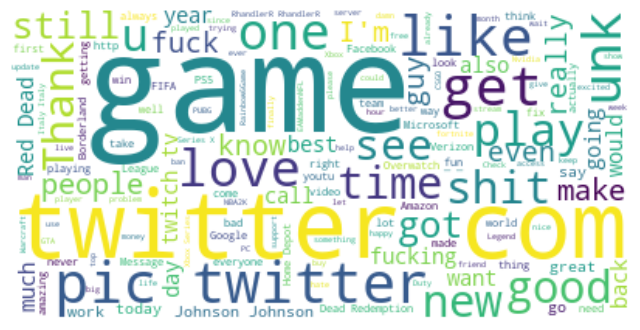

In [15]:
# Create stopword list:
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href"])
textt = " ".join(str(review) for review in data.Message)

# Set the background color to white
background_color = 'white'

#generating Word Cloud
wordcloud = WordCloud(stopwords=stopwords, background_color=background_color).generate(textt)

# Create a white figure with desired size
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.axis("off")  # Turn off axes

# Display the word cloud with white background
plt.imshow(wordcloud, interpolation='bilinear')

# Save and display the word cloud
plt.savefig('wordcloud11_white_bg.png')
plt.show()


<h1 style="color:olive;">Classifying Messages🕊️</h1>

In [16]:
# assign reviews with Sentiment == Positive as +1
# Sentiment == negative, assign -1
# remove Sentiment == Irrelevant to the entity
data = data[data['Sentiment'] != 'Irrelevant']


def sentiment_label(Sentiment):
  """
  Assigns score based on sentiment.

  Args:
      Sentiment: The review sentiment (string/ object value).

  Returns:
      A numerical representing the sentiment label: 'positive', 'negative' or 'neutral'.
  """
  if Sentiment == 'Positive':
    return +1
  elif Sentiment == 'Negative':
    return -1
  else:
    return 0  # for neutral

data['Score'] = data['Sentiment'].apply(sentiment_label)


In [17]:
data.head()

,ID,Entity,Sentiment,Message,Score
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,1
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,1
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,1
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,1
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,1


<h1 style="color:orange;">More Sentiment Analysis📊</h1>

In [18]:
fig = px.histogram(data, x="Score")
fig.update_traces(marker_color=['teal', 'cyan', 'ivory'],marker_line_color='rgb(8,48,107)',
                  marker_line_width=0.5)
fig.update_layout(title_text='Entity Sentiment')
fig.show()

In [19]:
data.head()

,ID,Entity,Sentiment,Message,Score
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,1
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,1
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,1
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,1
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,1


<h1 style="color:chartreuse;">Building the Model🛠️</h1>
Finally, we can build the sentiment analysis model!

This model will take reviews in as input. It will then come up with a prediction on whether the review is positive or negative.

<h1 style="color:deeppink;">Data Cleaning🧼</h1>
We will be using the message data to come up with predictions. First, we need to remove all punctuation from the data.

In [35]:
def remove_punctuation(text):
  """Removes punctuation marks from text.

  Args:
      text: The input text string.

  Returns:
      The text string with punctuation removed.
  """
  punctuation = set("?!.;:/*!\"[]@%-,{}<>\'")  # Create a set of punctuation characters
  return ''.join(char for char in text if char not in punctuation)

data['Message'] = data['Message'].apply(remove_punctuation)

In [36]:
data.isnull().sum()

ID           0
Entity       0
Sentiment    0
Message      0
Score        0
dtype: int64

In [38]:
data.shape

(61692, 5)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61692 entries, 0 to 74681
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         61692 non-null  int64 
 1   Entity     61692 non-null  object
 2   Sentiment  61692 non-null  object
 3   Message    61692 non-null  object
 4   Score      61692 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.8+ MB


In [40]:
data.nunique()

ID           10282
Entity          32
Sentiment        3
Message      57011
Score            3
dtype: int64

<h1 style="color:red;">Splitting the Dataframe🪓</h1>
The new data frame should only have two columns — “Message” (the review text data), and “Score” (the target variable).

In [41]:
dataNew = data[['Message','Score']]
dataNew.head()

,Message,Score
0,im getting on borderlands and i will murder yo...,1
1,I am coming to the borders and I will kill you...,1
2,im getting on borderlands and i will kill you all,1
3,im coming on borderlands and i will murder you...,1
4,im getting on borderlands 2 and i will murder ...,1


In [63]:
# random split train and test data
index = dataNew.index
dataNew['random_number'] = np.random.randn(len(index))
train = dataNew[dataNew['random_number'] <= 0.8]
test = dataNew[dataNew['random_number'] > 0.8]

C:\Users\quadi\AppData\Local\Temp\ipykernel_12136\326050630.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<h1 style="color:orange;">Creating a bag of words💰</h1>
We will need to convert the text into a bag-of-words model since the logistic regression algorithm cannot understand text.

In [70]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Message'])
test_matrix = vectorizer.transform(test['Message'])

<h1 style="color:mediumaquamarine;">Importing Logistic Regression🪭</h1>

In [71]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1.0)


In [72]:
#Split target and independent variables
X_train = train_matrix
X_test = test_matrix
y_train = train['Score']
y_test = test['Score']

In [73]:
#Fit model on data
model.fit(X_train,y_train)

C:\Users\quadi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [74]:
#Make predictions
predictions = model.predict(X_test)

<h1 style="color:chartreuse;">Testing🧪</h1>
Now, we can test the accuracy of our model!

In [76]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report

new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[4207,  314,  329],
       [ 244, 3095,  260],
       [ 337,  521, 3834]], dtype=int64)

In [77]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.88      0.87      0.87      4850
           0       0.79      0.86      0.82      3599
           1       0.87      0.82      0.84      4692

    accuracy                           0.85     13141
   macro avg       0.84      0.85      0.85     13141
weighted avg       0.85      0.85      0.85     13141



<h6>The overall accuracy of the model on the test data is around <span style="color:deeppink;">85% 🎉</span>, which is pretty good considering we didn’t do any feature extraction or much preprocessing.

And… That’s it!</h6>